## TP2 : Extraction d'information
STIC-B545 | Traitement automatique de corpus

Antonio Pitisci | 
antonio.pitisci@ulb.be 

## Imports

In [ ]:
# Imports pour l'étape 3
import os
import yake

# Imports pour l'étape 4
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from IPython.display import Image

# Imports pour l'étape 5
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences

# Imports pour l'étape 6
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

import sys
import pandas as pd
import matplotlib.pyplot as plt


# Etape 3 : Extraction des mots clés à l'aide de Yake
https://github.com/LIAAD/yake

Modifiez le notebook s1_keywords.ipynb pour extraire uniquement les mots clés relatifs à cette année. 

J'ai choisi l'année 1969.

In [2]:
# Instancier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [ ]:
# Lister les fichiers
data_path = "../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt') and "1969" in f]

In [ ]:
# Imprimer le nombre de fichiers identifiés concernant l'année 1969
print(f"Nombre de fichiers identifiés concernant l'année 1969 : {len(files)}")

Nombre de fichiers identifiés concernant l'année 1969 : 100


In [ ]:
# Afficher les noms des fichiers identifiés
print("Fichiers concernant l'année 1969 :")
for f in sorted(files):
    print(f)

Fichiers concernant l'année 1969 identifiés :
KB_JB838_1969-01-04_01-00014.txt
KB_JB838_1969-01-05_01-00012.txt
KB_JB838_1969-01-11_01-00010.txt
KB_JB838_1969-01-15_01-00017.txt
KB_JB838_1969-01-22_01-00015.txt
KB_JB838_1969-02-05_01-00021.txt
KB_JB838_1969-02-07_01-00019.txt
KB_JB838_1969-02-09_01-00007.txt
KB_JB838_1969-02-16_01-00031.txt
KB_JB838_1969-02-22_01-00011.txt
KB_JB838_1969-02-27_01-00032.txt
KB_JB838_1969-03-01_01-00023.txt
KB_JB838_1969-03-02_01-00005.txt
KB_JB838_1969-03-02_01-00018.txt
KB_JB838_1969-03-06_01-00021.txt
KB_JB838_1969-03-06_01-00022.txt
KB_JB838_1969-03-11_01-00003.txt
KB_JB838_1969-03-18_01-00014.txt
KB_JB838_1969-03-19_01-00003.txt
KB_JB838_1969-03-22_01-00018.txt
KB_JB838_1969-03-25_01-00017.txt
KB_JB838_1969-03-25_01-00025.txt
KB_JB838_1969-03-28_01-00005.txt
KB_JB838_1969-04-01_01-00007.txt
KB_JB838_1969-04-01_01-00018.txt
KB_JB838_1969-04-02_01-00014.txt
KB_JB838_1969-04-02_01-00021.txt
KB_JB838_1969-04-03_01-00034.txt
KB_JB838_1969-04-08_01-00014.t

In [6]:
# Créer le dossier "Articles 1969" s'il n'existe pas
output_dir = "../data/Articles 1969"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Copier les fichiers identifiés dans le dossier "Articles 1969"
for f in files:
    source = os.path.join(data_path, f)
    destination = os.path.join(output_dir, f)
    if not os.path.exists(destination):  # si le fichier existe déjà, ne le copie pas
        with open(source, 'rb') as src_file:
            content = src_file.read()
        with open(destination, 'wb') as dest_file:
            dest_file.write(content)

print(f"Tous les articles relatifs à l'année 1969 ont été enregistrés dans le dossier '{output_dir}' avec succès.")

Tous les articles relatifs à l'année 1969 ont été enregistrés dans le dossier '../data/Articles 1969' avec succès.


In [8]:
# Chemin du dossier contenant les articles de 1969
data_path = "../data/Articles 1969/"

In [9]:
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentionne ces mots-clés : {', '.join(kept)}...")

KB_JB838_1969-01-04_01-00014.txt mentionne ces mots-clés : Fds Rtes, TITRES COURS, PRECOMPTE SNCB, Rand Mines, act. act, PRECOMPTE Anvers, COURS COURS, PRECOMPTE Gand, Bruxelles VENDREDI, lots Lots, JANVIER Marché, Gand Liège, PRECOMPTE DEDUIT...
KB_JB838_1969-01-05_01-00012.txt mentionne ces mots-clés : satisfaction Victorieuse, LESblR fîDIMANCH, résultats inespérés, prévu Bremerhaven, l'équipe féminine, Gantoise Braem, Grand prix, Attelé Jos...
KB_JB838_1969-01-11_01-00010.txt mentionne ces mots-clés : DIVISION III, Racing White, Soft SAMEDI, samedi soir, Léo Proost, Van Laneker, Léopold Club...
KB_JB838_1969-01-15_01-00017.txt mentionne ces mots-clés : janvier Messieurs, RENTE VIAGERE, OFFICE PROPRIETAIRES, WATERLOO Villa, VENTE PUBLIQUE...
KB_JB838_1969-01-22_01-00015.txt mentionne ces mots-clés : Volkswagen qu’on, seulement parce, c’est précisément, gamme Volkswagen, Solide dose, MONDE IMPORTATEUR, MEILLEURS ANCIENS, ANCIENS ETABLISSEMENTS, ETABLISSEMENTS AGENTS, BELGIQUE DTETEREN

# Etape 4 : Stopwords et nuage de mots
Enrichissez de manière itérative la liste de stopwords et générez un nuage de mots pour l’année choisie avec s2_wordcloud.ipynb (image à inclure dans le rapport).

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Stopwords (Idem que dans s1 et s2)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

# Liste des nouveaux stopwords à ajouter
new_stopwords = ["mon", "ton", "son", "notre", "votre", "leur", "leurs", "nos", "vos", "leurs",
                 "mes", "tes", "ses", "quel", "quelle", "quels", "quelles", "clic", "combien",
                 "comme", "comment", "comparable", "comparables", "compris", "concernant",
                 "contre", "couic", "crac", "dda", "dans", "de", "debout", "dedans", "dehors",
                 "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des"]

# Ajouter les nouveaux stopwords de manière itérative à la liste sw, en vérifiant s'ils sont déjà présents dans cette dernière
for word in new_stopwords:
    if word not in sw:
        sw.append(word)

sw = set(sw)


In [12]:
# Afficher le nombre total de stopwords
print(f"Nombre total de stopwords : {len(sw)}")

# Afficher la liste complète des stopwords
print("Liste des stopwords :", sorted(sw))

Nombre total de stopwords : 224
Liste des stopwords : ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'clic', 'combien', 'comme', 'comment', 'comparable', 'comparables', 'compris', 'concernant', 'contre', 'couic', 'crac', 'd', 'dans', 'dda', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'dem', 'depuis', 'dernier', 'derniere', 'derriere', 'derrière', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus

Création du fichier contenant le texte de tous les journaux de 1969

In [13]:
# Choisir une année
year = 1969

In [ ]:
# Lister les fichiers de 1969
txt_path = "../data/Articles 1969/"
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

103

In [15]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [16]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

103

In [17]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"t Dt» LE SOIR b Bourse de Bruxelles VENDREDI 3 JANVIER Marché toujours soutenu' L'activité est moins étoffée que la Veille et quelques prises de bénéfices donnent à la cote une physionomie moins unifo"

In [18]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [19]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"t Dt» LE SOIR b Bourse de Bruxelles VENDREDI 3 JANVIER Marché toujours soutenu' L'activité est moins étoffée que la Veille et quelques prises de bénéfices donnent à la cote une physionomie moins uniformément favorable. Toutefois, plusieurs points de soutien, voire de fermeté, subsistent, tant en Valeurs locales qu’en titres étrangers. Parmi ces derniers, les non- ferreux demeurent très entourés. La demande de Londres est assez importante en R. S. T., 662, et en Zam- blan Anglo où l’ancienne pass"

Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [ ]:
# Appliquer la fonction de nettoyage
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [ ]:
# Appliquer la fonction sur le fichier unique 1969
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1969_clean.txt!'

In [22]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SOIR BOURSE BRUXELLES VENDREDI JANVIER MARCHÉ TOUJOURS SOUTENU ACTIVITÉ ÉTOFFÉE VEILLE QUELQUES PRISES BÉNÉFICES DONNENT COTE PHYSIONOMIE UNIFORMÉMENT FAVORABLE TOUTEFOIS PLUSIEURS POINTS SOUTIEN VOIRE FERMETÉ SUBSISTENT TANT VALEURS LOCALES TITRES ÉTRANGERS PARMI DERNIERS FERREUX DEMEURENT TRÈS ENTOURÉS DEMANDE LONDRES ASSEZ IMPORTANTE ZAM BLAN ANGLO ANCIENNE PASSE NOUVELLE AURIFÈRES HAUSSE CITY ACCENTUENT CHEZ AVANCE JEUDI SURTOUT RAND MINES PRÈS BRAND PARMI VALEURS BELGES AMÉLIORATION APPRÉCI'

Nuage de mots

In [23]:
# Afficher les termes les plus fréquents
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('FOIS', 4921), ('APPARAIT', 4778), ('CORPUS', 4776), ('TÉL', 1922), ('BRUXELLES', 1413), ('RUE', 1172), ('APP', 914), ('BRUX', 690), ('ANS', 639), ('GAR', 584)]


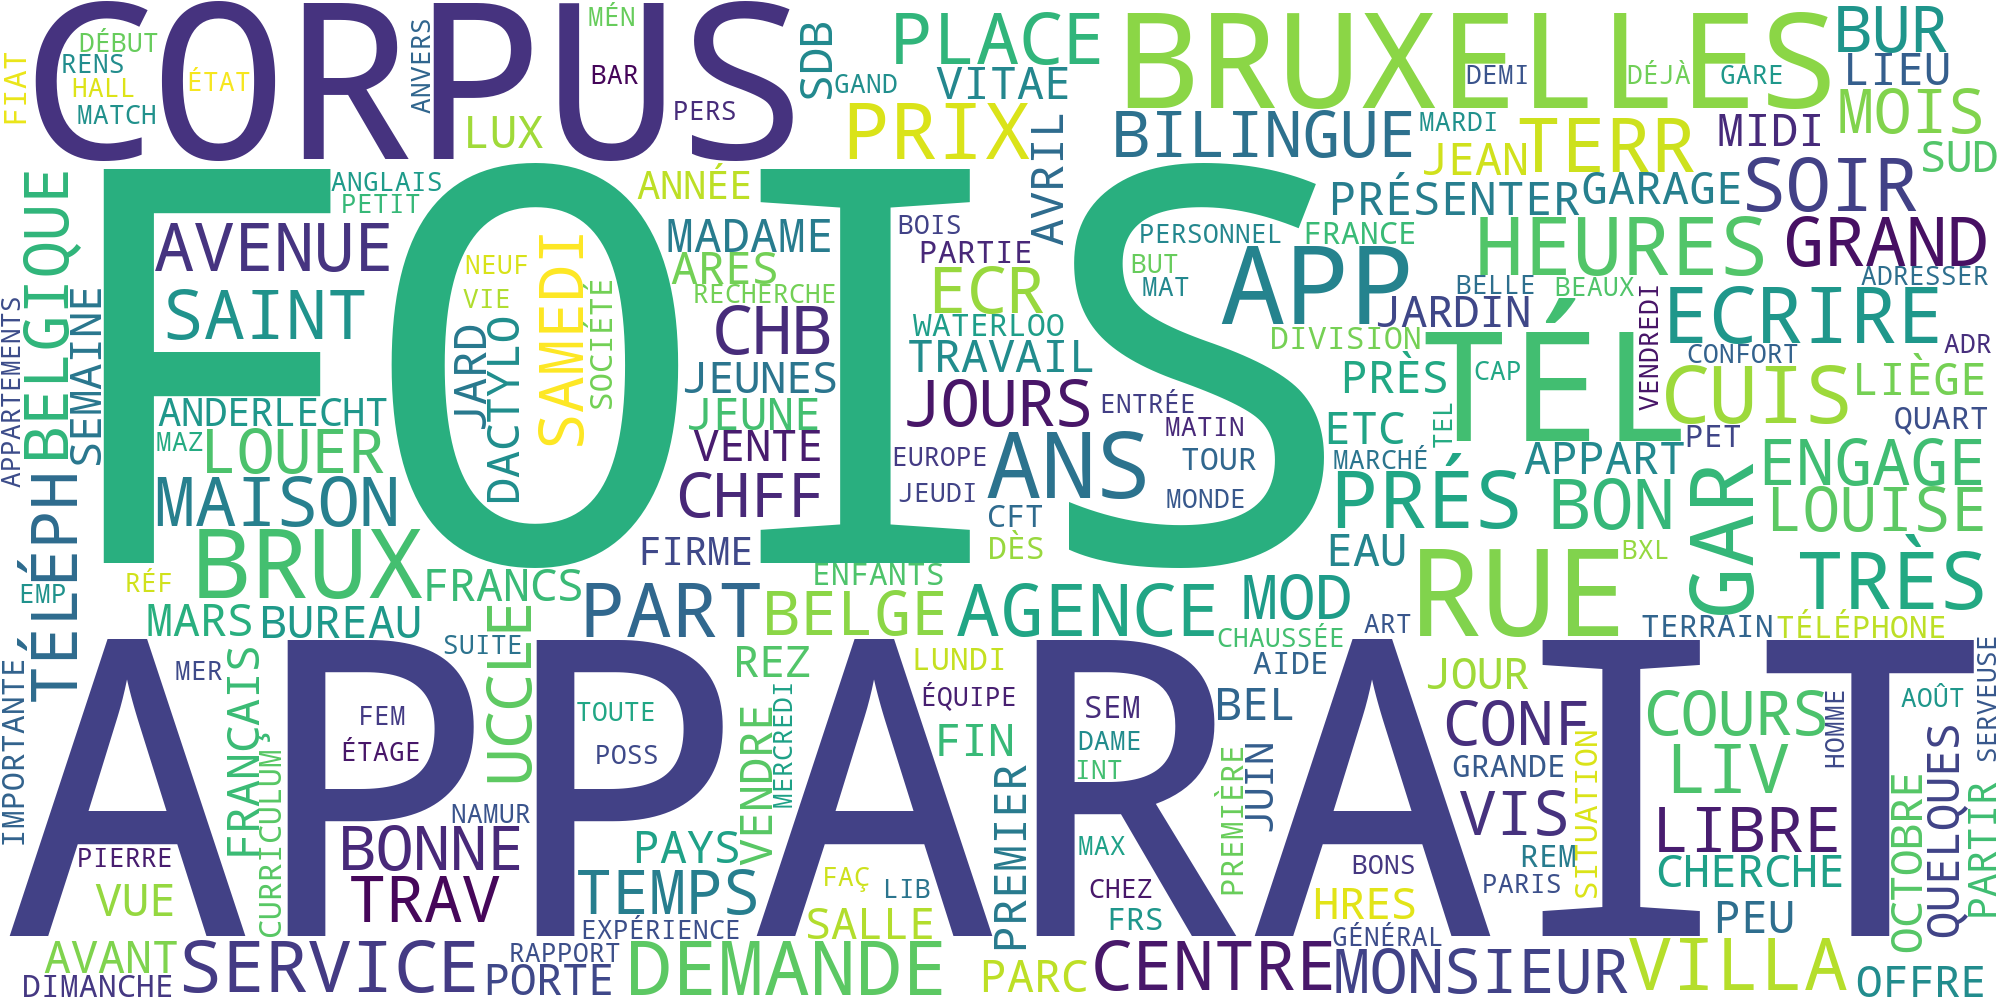

In [24]:
# Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Etape 5 : Entités nommées
Modifiez le notebook s3_ner.ipynb pour trouver les entités nommées principales (personnes, organisations et lieux) pertinentes pour cette année.

In [25]:
!python -m spacy download fr_core_news_md

     ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
      --------------------------------------- 0.8/45.8 MB 4.8 MB/s eta 0:00:10
     - -------------------------------------- 1.8/45.8 MB 5.0 MB/s eta 0:00:09
     -- ------------------------------------- 2.6/45.8 MB 4.9 MB/s eta 0:00:09
     -- ------------------------------------- 3.4/45.8 MB 4.6 MB/s eta 0:00:10
     --- ------------------------------------ 4.5/45.8 MB 4.4 MB/s eta 0:00:10
     ---- ----------------------------------- 5.2/45.8 MB 4.3 MB/s eta 0:00:10
     ---- ----------------------------------- 5.5/45.8 MB 3.9 MB/s eta 0:00:11
     ----- ---------------------------------- 6.0/45.8 MB 3.7 MB/s eta 0:00:11
     ----- ---------------------------------- 6.6/45.8 MB 3.6 MB/s eta 0:00:11
     ------ --------------------------------- 7.1/45.8 MB 3.5 MB/s eta 0:00:12
     ------ --------------------------------- 7.9/45.8 MB 3.5 MB/s eta 0:00:11
     ------- -------------------------------- 8.4/45.8 MB 3

In [28]:
nlp = spacy.load('fr_core_news_md')

In [ ]:
# Charger le texte unique et nettoyé
n=1000000
text = open("../data/tmp/1969_clean.txt", encoding='utf-8').read()[:n]

In [ ]:
# Traiter le texte unique et nettoyé
doc = nlp(text)

Compter les entités

In [31]:
# Personnes
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [32]:
# Organisations
organisations = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisations[ent.text] += 1

In [33]:
# Lieux
places = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        places[ent.text] += 1

Trier et imprimer

In [34]:
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

NAPOLÉON apparait 4 fois dans le corpus
LEE COBB apparait 3 fois dans le corpus
TILLEUR apparait 3 fois dans le corpus
LAMBUSART apparait 2 fois dans le corpus
HECTARES apparait 2 fois dans le corpus
LOUIS SCHMIDT apparait 2 fois dans le corpus
DUMONT apparait 2 fois dans le corpus
LOUIS MICHIELS apparait 2 fois dans le corpus
LOUIS SMETS apparait 2 fois dans le corpus
LOUIS GORILLES apparait 2 fois dans le corpus
FOUILLES apparait 2 fois dans le corpus
MARDAGA apparait 2 fois dans le corpus
BELIARD SCHIPP apparait 1 fois dans le corpus
ANARÉ MUSCHG apparait 1 fois dans le corpus
AIGLES LEBRUN apparait 1 fois dans le corpus
ABANDON apparait 1 fois dans le corpus
LOUIS CALINKA apparait 1 fois dans le corpus
JOS COMBE apparait 1 fois dans le corpus
COINTE apparait 1 fois dans le corpus
JAHSSÉNLS SÀMÉDI apparait 1 fois dans le corpus
LYKKE EUGEH apparait 1 fois dans le corpus
CARNIÈRES PERSÉVÉRANCE apparait 1 fois dans le corpus
FARIEY apparait 1 fois dans le corpus
MARCÉI WIERTZ PART app

In [35]:
sorted_organisations = sorted(organisations.items(), key=lambda kv: kv[1], reverse=True)

for organisation, freq in sorted_organisations[:50]:
    print(f"{organisation} apparait {freq} fois dans le corpus")

RENS apparait 52 fois dans le corpus
GAND apparait 48 fois dans le corpus
SNCB apparait 33 fois dans le corpus
ANDERLECHT apparait 30 fois dans le corpus
AGENCE apparait 27 fois dans le corpus
FIRME apparait 27 fois dans le corpus
EUROPE apparait 25 fois dans le corpus
PART apparait 25 fois dans le corpus
OUVR apparait 23 fois dans le corpus
HRES apparait 22 fois dans le corpus
PARC apparait 19 fois dans le corpus
EMPLOYEE apparait 19 fois dans le corpus
ROBERT apparait 16 fois dans le corpus
FRANÇAIS apparait 16 fois dans le corpus
FIAT apparait 16 fois dans le corpus
SCHAERBEEK apparait 15 fois dans le corpus
GARAGE apparait 15 fois dans le corpus
RHODE apparait 15 fois dans le corpus
PAYS apparait 14 fois dans le corpus
MAZOUT apparait 14 fois dans le corpus
DCHE apparait 14 fois dans le corpus
MONTAGNE apparait 13 fois dans le corpus
FRIGO apparait 13 fois dans le corpus
PRÉTENTIONS apparait 13 fois dans le corpus
PLAC apparait 12 fois dans le corpus
PARF apparait 12 fois dans le c

In [36]:
sorted_places = sorted(places.items(), key=lambda kv: kv[1], reverse=True)

for place, freq in sorted_places[:50]:
    print(f"{place} apparait {freq} fois dans le corpus")

JAPON apparait 5 fois dans le corpus
ECRIRE apparait 5 fois dans le corpus
FIRME apparait 5 fois dans le corpus
MONS apparait 5 fois dans le corpus
TERRE apparait 4 fois dans le corpus
GARE NORD apparait 4 fois dans le corpus
TERR BÂT apparait 4 fois dans le corpus
INTIMITÉ apparait 4 fois dans le corpus
CONGO apparait 3 fois dans le corpus
MATCHES apparait 3 fois dans le corpus
CONNUE apparait 3 fois dans le corpus
LEVEAU apparait 3 fois dans le corpus
METZ apparait 3 fois dans le corpus
ESTECON MYRTES apparait 2 fois dans le corpus
FERN apparait 2 fois dans le corpus
TERR SUD apparait 2 fois dans le corpus
ALCOOLISME apparait 2 fois dans le corpus
PRIMAT ESPAGNE apparait 2 fois dans le corpus
ORIENTE apparait 2 fois dans le corpus
LIVOURNE apparait 2 fois dans le corpus
MÉRODE apparait 2 fois dans le corpus
PART apparait 2 fois dans le corpus
BILANS apparait 2 fois dans le corpus
CHINE apparait 2 fois dans le corpus
OPÉRETTE apparait 2 fois dans le corpus
TROIE apparait 2 fois dans l

Sauvegarder les résultats dans des fichiers txt

In [ ]:
# Enregistrer les personnes
people_file_path = os.path.join(output_dir, 'personnes_1969_sorted.txt')
with open(people_file_path, mode='w', encoding='utf-8') as file:
    for person, freq in sorted_people:
        file.write(f"{person} apparait {freq} fois dans le corpus\n")

# Enregistrer les organisations
organisations_file_path = os.path.join(output_dir, 'organisations_1969_sorted.txt')
with open(organisations_file_path, mode='w', encoding='utf-8') as file:
    for organisation, freq in sorted_organisations:
        file.write(f"{organisation} apparait {freq} fois dans le corpus\n")

# Enregistrer les lieux
places_file_path = os.path.join(output_dir, 'lieux_1969_sorted.txt')
with open(places_file_path, mode='w', encoding='utf-8') as file:
    for place, freq in sorted_places:
        file.write(f"{place} apparait {freq} fois dans le corpus\n")

print(f"Les résultats ont été sauvegardés dans le dossier {output_dir} avec succès.")

Les résultats ont été sauvegardés dans le dossier ../data/Articles 1969


# Etape 6 : Analyse des sentiments à l'aide de Textblob-FR
Documentation: https://textblob.readthedocs.io/en/dev/

Sélectionnez arbitrairement 10 phrases dans les articles de l'année choisie et analysez-les à l'aide du notebook s4_sentiment.ipynb, puis résumez les résultats dans un tableau indiquant leur polarité et leur subjectivité.

In [ ]:
# Initialiser l'objet Blobber

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

# Définir la fonction get_sentiment pour l'analyse de sentiment 
def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity_perc}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

# Ajouter un retour pour que l'on puisse afficher les résultats dans un tableau
    return {
        "Polarité": polarity_str,
        "Subjectivité": subjectivity_str
    }

In [ ]:
# Analyser le sentiment de 10 phrases
phrases = [
    "Ils jouent bien, puis s'énervent, perdent des points, jouent à nouveau bien, se disputent, on ne sait, pourquoi, et finissent par perdre un match qui était à leur portée.",
    "Nous pouvons modifier votre silhouette absolument suivant vos désirs, soit l’amincir, soit la développer (slimming or re-shaping), sans pilules, sans régime.",
    "C’est très mal de mettre le pied dans l’escroquerie, et très imprudent aussi, car cela peut vous conduire tout droit en prison.",
    "Les verrous culturels sont, selon lui, antidémocratiques et antihistoriques.",
    "Quant au liant, il est magnifique et même parfois oppressant.",
    "C’est le miracle des méthodes audio-visuelles modernes !",
    "Quelle différence avec la situation démographique actuelle qui, elle, accuse une proportion nettement plus élevée de personnes très âgées !",
    "Les dirigeants liégeois se félicitent aujourd’hui d’avoir écouté les conseils de M. Météo, qui leur avait prédit le dégel pour les trois derniers jours de la semaine.",
    "Pétrole Hahn est la première lotion capillaire ayant obtenu simultanément le label de qualité France et Belgique.",
    "Dans le domaine du divertissement et du grand spectacle, Funny Girl est une réussite comme on n’en voit pas souvent et qui nous donne grande envie de revoir Barbra Streisand lé plus tôt possible !"
]

In [41]:
# Créer une liste de dictionnaires avec les résultats d'analyse
results = [get_sentiment(phrase) for phrase in phrases]

This text is 11% positive and 22% subjective.
This text is neutral and perfectly objective.
This text is 15% negative and 44% subjective.
This text is 10% positive and 20% subjective.
This text is 50% positive and 75% subjective.
This text is 25% positive and 10% subjective.
This text is 9% positive and 28% subjective.
This text is 17% negative and 5% subjective.
This text is 45% positive and 10% subjective.
This text is 19% positive and 20% subjective.


In [ ]:
# Créer un tableau / dataframe pandas à partir des résultats 
df = pd.DataFrame(results) 
# L'afficher 
print(df)

       Polarité         Subjectivité
0  11% positive       22% subjective
1       neutral  perfectly objective
2  15% negative       44% subjective
3  10% positive       20% subjective
4  50% positive       75% subjective
5  25% positive       10% subjective
6   9% positive       28% subjective
7  17% negative        5% subjective
8  45% positive       10% subjective
9  19% positive       20% subjective
